In [2]:
import torch

from reggae.utilities import save, load

from reggae.gp.variational.models import SingleLinearLFM, NonLinearLFM, ExponentialLFM
from reggae.gp.variational.trainer import TranscriptionalTrainer
from reggae.gp.variational.options import VariationalOptions
from reggae.data_loaders import HafnerData
from reggae.plot.variational_plotters import Plotter
from matplotlib import pyplot as plt

import numpy as np

f64 = np.float64

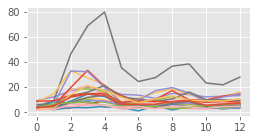

In [3]:
dataset = HafnerData(replicate=0, data_dir='../data/', extra_targets=False)
num_replicates = 1
num_genes = len(dataset.gene_names)
num_tfs = 1
num_times = dataset[0][0].shape[0]

t_inducing = torch.linspace(0, 13, num_times, dtype=torch.float64).reshape((-1, 1))
t_observed = torch.linspace(0, 13, num_times)
t_predict = torch.linspace(0, 13, 80, dtype=torch.float64)

m_observed = torch.stack([
    dataset[i][1] for i in range(num_genes*num_replicates)
]).view(num_replicates, num_genes, num_times)

plt.figure(figsize=(4, 2))
for i in range(22):
    plt.plot(dataset[i][1])

In [4]:
print(t_observed)

tensor([ 0.0000,  1.0833,  2.1667,  3.2500,  4.3333,  5.4167,  6.5000,  7.5833,
         8.6667,  9.7500, 10.8333, 11.9167, 13.0000])


In [3]:
options = VariationalOptions(
    learn_inducing=False,
    num_samples=50,
    kernel_scale=False,
    initial_conditions=True
)

model = NonLinearLFM(num_genes, num_tfs, t_inducing, dataset, options)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
trainer = TranscriptionalTrainer(model, optimizer, dataset)
plotter = Plotter(model, np.array(dataset.gene_names))

C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models\model.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = Parameter(torch.tensor(t_inducing), requires_grad=options.learn_inducing)
C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models\model.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.initial_conditions = Parameter(torch.tensor(torch.zeros(self.num_outputs, 1)), requires_grad=True)


### Outputs prior to training:

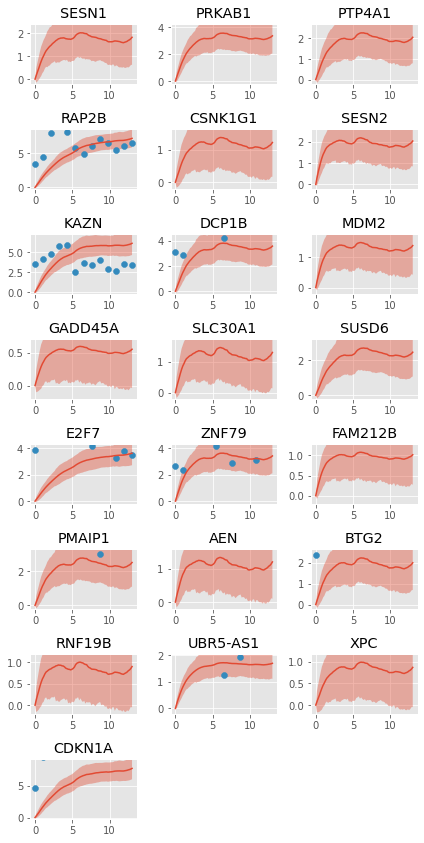

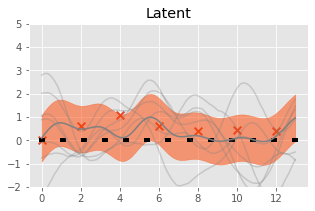

In [4]:
rtol = 1e-2
atol = rtol/10

model_kwargs = {
    'rtol': rtol, 'atol': atol
}

plotter.plot_outputs(t_predict, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict, ylim=(-2, 5), plot_barenco=True, plot_inducing=False)

Epoch 1/100 - Loss: 14754.88 (14754.88 0.00) λ: 1.579 b: 0.33 d 0.50 s: 0.98
Epoch 6/100 - Loss: 6553.06 (6487.25 65.81) λ: 1.593 b: 0.75 d 0.16 s: 1.39
Epoch 11/100 - Loss: 3580.84 (3554.64 26.20) λ: 1.302 b: 0.81 d 0.38 s: 1.40
Epoch 16/100 - Loss: 2110.95 (2078.49 32.46) λ: 1.080 b: 0.94 d 0.43 s: 1.55
Epoch 21/100 - Loss: 1731.64 (1693.18 38.46) λ: 0.874 b: 1.05 d 0.43 s: 1.66
Epoch 26/100 - Loss: 1483.04 (1436.18 46.85) λ: 0.696 b: 1.09 d 0.51 s: 1.56
Epoch 31/100 - Loss: 1285.10 (1233.86 51.24) λ: 0.557 b: 1.10 d 0.59 s: 1.39
Epoch 36/100 - Loss: 1140.00 (1082.64 57.36) λ: 0.486 b: 1.15 d 0.60 s: 1.30
Epoch 41/100 - Loss: 1089.81 (1024.05 65.76) λ: 0.468 b: 1.20 d 0.58 s: 1.26
Epoch 46/100 - Loss: 1017.13 (950.87 66.25) λ: 0.448 b: 1.23 d 0.56 s: 1.18
Epoch 51/100 - Loss: 938.19 (871.35 66.85) λ: 0.464 b: 1.24 d 0.55 s: 1.07
Epoch 56/100 - Loss: 909.33 (840.64 68.69) λ: 0.492 b: 1.26 d 0.54 s: 0.97
Epoch 61/100 - Loss: 885.78 (816.45 69.33) λ: 0.524 b: 1.28 d 0.51 s: 0.91
Epoch 6

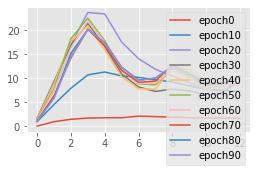

In [5]:
tol = 5e-3
# trainer = Trainer(optimizer)
output = trainer.train(100, rtol=tol, atol=tol/10, report_interval=5, plot_interval=10)

### Outputs after training

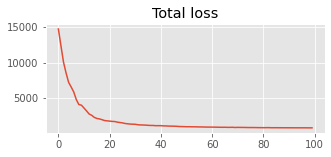

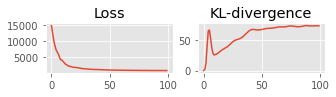

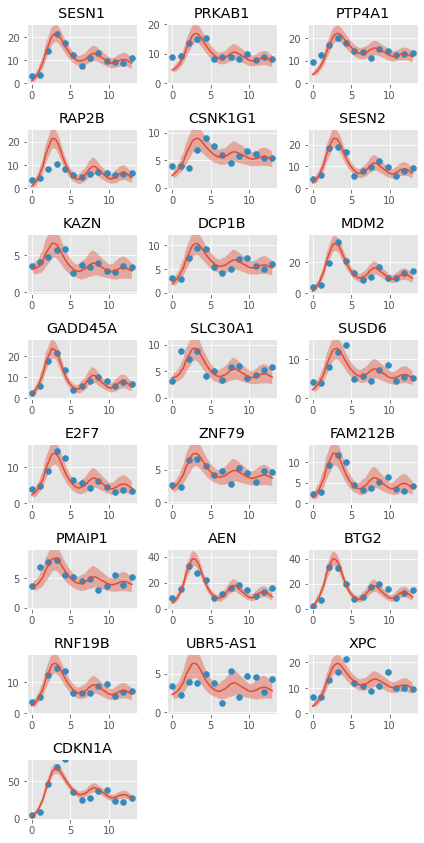

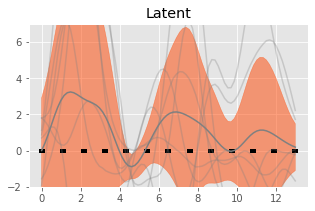

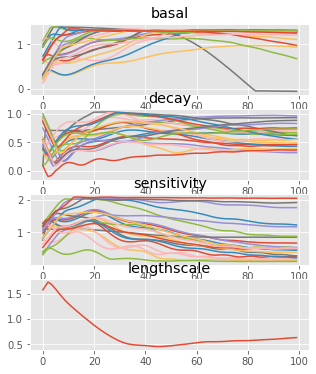

In [6]:
plotter.plot_losses(trainer, last_x=100)
plotter.plot_outputs(t_predict, replicate=0, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict, ylim=(-2, 7), plot_inducing=False)
plotter.plot_convergence(trainer)


In [ ]:
save(model, 'nonlinear')

In [ ]:
do_load = False
if do_load:
    model = load('nonlinear', NonLinearLFM, num_genes, num_tfs,
                 t_inducing, dataset, extra_points=2, fixed_variance=dataset.variance)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    trainer = TranscriptionalTrainer(model, optimizer, dataset)